# Test image importing, matrix and flattening
This is just a test to check the RGB values using PIL and flattening the image array. 
THIS IS UNCORRELATED WITH THE REST OF THE NOTEBOOK

(1536, 2048, 3)
[196 212 167]
(9437184,)


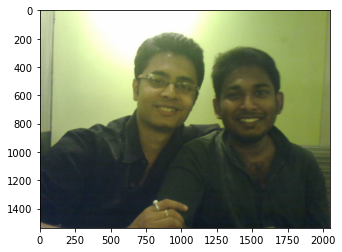

In [12]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

def image_loading(imgname, root='./'):
    img = '{}.jpg'.format(imgname)
    img_path = os.path.join(root, img)
    img_load = Image.open(img_path)
    return np.array(img_load)

my_img = image_loading('BRIGHT_IMAGE')
plt.imshow(my_img)

print(my_img.shape)
print(my_img[0, 0])

flat_img = my_img.flatten()

print(flat_img.shape)

# Flattening thus even flats out the RGB values of individual pixels
assert flat_img.shape[0] == my_img.shape[0] * my_img.shape[1] * my_img.shape[2]

# Extract Histogram of Oriented Gradients (HOG) for a given image
This can be useful in image classification problems. Hogging basically helps the classifier to identify the boundaries and thus recognize shape of objects

(3909060,)


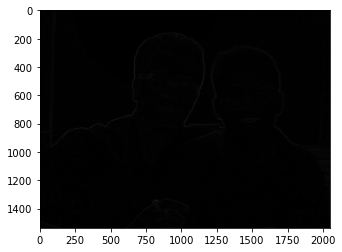

In [20]:
import skimage
from skimage.color import rgb2gray
from skimage.feature import hog
import matplotlib as mpl

gray_img = rgb2gray(my_img)

hog_features, hog_img = hog(gray_img, 
                            visualize=True,
                            pixels_per_cell=(8, 8),
                            block_norm='L2-Hys')

print(hog_features.shape)

plt.imshow(hog_img, cmap=mpl.cm.gray)

# ORIGINAL TASK

In [1]:
import skimage

In [2]:
from skimage import feature, data, restoration, filters, measure, segmentation

In [3]:
import matplotlib.pyplot as plt
from matplotlib import patches

In [4]:
%matplotlib inline

In [5]:
trained_data = data.lbp_frontal_face_cascade_filename()

In [6]:
detector = feature.Cascade(trained_data)

In [7]:
def face_detector(img, min_size, max_size):
    detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(min_size, min_size),
                                       max_size=(max_size, max_size))
    return detected

In [8]:
def show_faces_rectangle(img, detected):
    plt.imshow(img)
    img_desc = plt.gca()
    plt.set_cmap('gray')

    for patch in detected:

        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )

    plt.show()

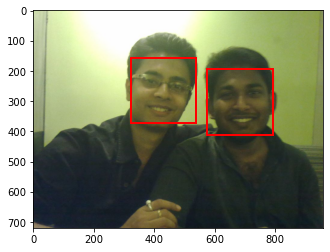

In [9]:
img = plt.imread('./BRIGHT_IMAGE.jpg') #data.astronaut()

#plt.imshow(img)
#plt.show()


detected = face_detector(img, 50, 300)

show_faces_rectangle(img, detected)

In [10]:
def extract_faces(img, detected):
    faces = []
    for d in detected:
        x, y = d['r'], d['c']
        width, height = x+d['width'], y+d['height']
        face = img[x:width, y:height]
        plt.figure()
        plt.imshow(face)
        plt.plot()
        faces.append(face)
    return faces

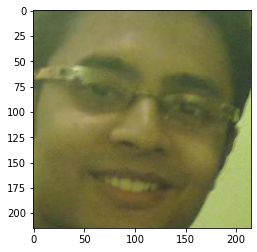

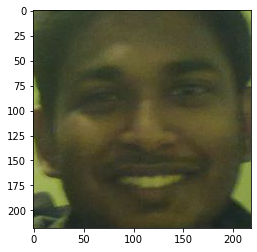

In [11]:
faces = extract_faces(img, detected)

In [12]:
def denoise_face(faces):
    for face in faces:
        denoised_face = restoration.denoise_tv_chambolle(face, 
                                                         weight=0.001, 
                                                         multichannel=True)
        plt.imshow(denoised_face)
        plt.show()

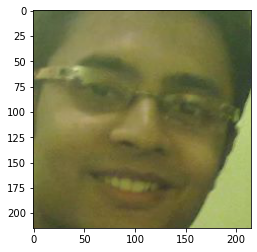

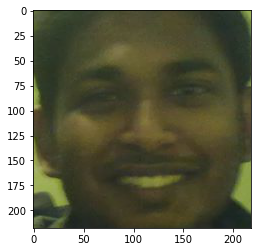

In [13]:
denoise_face(faces)

<ipython-input-16-2b4cd61eb602>:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(img, n_segments=1000)
<ipython-input-16-2b4cd61eb602>:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_img = color.label2rgb(segments, img, kind='avg')


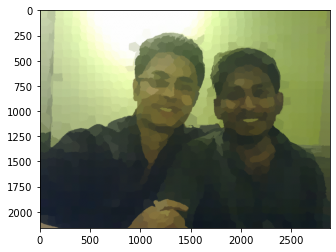

In [16]:
from skimage import color

segments = segmentation.slic(img, n_segments=1000)
segmented_img = color.label2rgb(segments, img, kind='avg')

rescaled_segmented_img = skimage.transform.rescale(segmented_img, 
                                                   3, 
                                                   anti_aliasing=True, 
                                                   multichannel=True)

plt.imshow(rescaled_segmented_img)
plt.show()